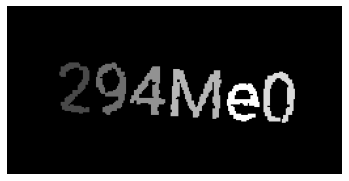

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


img = np.dot(plt.imread('https://i.stack.imgur.com/ypBGu.png')[...,:3], [0.299, 0.587, 0.114])

img = 1 - (img > .6)
img = ndimage.binary_erosion(img, structure=np.ones((2,2))).astype(int)
img = ndimage.binary_dilation(img, structure=np.ones((3,3))).astype(int)

labeled_array, num_features = ndimage.label(img)
label, counts = np.unique(labeled_array, return_counts=True)
labeled_array[np.isin(labeled_array, label[counts < 200])] = 0

plt.imshow(labeled_array, cmap='gray')
plt.axis('off');
plt.imsave('test1.png', labeled_array)

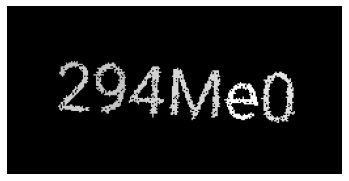

In [ ]:
img = np.dot(plt.imread('https://i.stack.imgur.com/ypBGu.png')[...,:3], [0.299, 0.587, 0.114])
img = 1 - (img > .6)

labeled_array, num_features = ndimage.label(img)
label, counts = np.unique(labeled_array, return_counts=True)
labeled_array[np.isin(labeled_array, label[counts < 10])] = 0
plt.imshow(labeled_array, cmap='gray')
plt.axis('off');

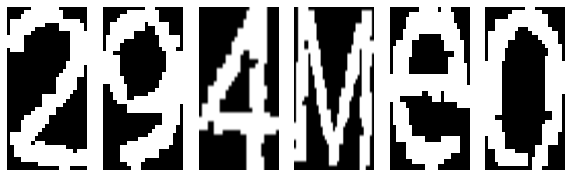

In [ ]:
scan = labeled_array[np.where(labeled_array != 0)[0][[0,-1]].sum() // 2]
order = np.argsort(np.unique(scan, return_index=True)[1][1:])
chars = np.unique(labeled_array)[1:][order]


fig, ax = plt.subplots(nrows=1, ncols=len(chars), figsize=(10, 3))

for e,i in enumerate(chars):
    clip = np.where(labeled_array == i)
    ymin, ymax = clip[0][[0,-1]]
    xmin, xmax = clip[1].min(), clip[1].max()

    ax[e].imshow(labeled_array[ymin:ymax+1, xmin:xmax+1], cmap='gray', aspect='auto', interpolation=None)
    ax[e].axis('off')